In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('data/titanic_train_data.csv')

In [3]:
test_data = pd.read_csv('data/titanic_test_data.csv')

In [4]:
train_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,NaN,0,0,15.5000,Q,Third,man,True,NaN,Queenstown,no,True
1,1,3,female,38.0,1,5,31.3875,S,Third,woman,False,NaN,Southampton,yes,False
2,0,3,male,34.5,0,0,6.4375,C,Third,man,True,NaN,Cherbourg,no,True
3,0,1,male,NaN,0,0,221.7792,S,First,man,True,C,Southampton,no,True
4,1,2,female,24.0,0,2,14.5000,S,Second,woman,False,NaN,Southampton,yes,False


In [5]:
test_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
1,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
2,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
3,0,3,male,NaN,1,0,15.5000,Q,Third,man,True,NaN,Queenstown,no,False
4,0,3,male,NaN,2,0,21.6792,C,Third,man,True,NaN,Cherbourg,no,False


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     802 non-null    int64  
 1   pclass       802 non-null    int64  
 2   sex          802 non-null    object 
 3   age          645 non-null    float64
 4   sibsp        802 non-null    int64  
 5   parch        802 non-null    int64  
 6   fare         802 non-null    float64
 7   embarked     800 non-null    object 
 8   class        802 non-null    object 
 9   who          802 non-null    object 
 10  adult_male   802 non-null    bool   
 11  deck         182 non-null    object 
 12  embark_town  800 non-null    object 
 13  alive        802 non-null    object 
 14  alone        802 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 83.1+ KB


In [7]:
train_data.shape

(802, 15)

In [8]:
train_data.isnull().sum()

survived         0
pclass           0
sex              0
age            157
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           620
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
train_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,802.000000,802.000000,645.000000,802.000000,802.000000,802.000000
mean,0.382793,2.316708,29.495101,0.522444,0.385287,31.954914
std,0.486372,0.831313,14.460106,1.093675,0.817983,50.129432
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.923950
max,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200


In [10]:
train_data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
train_data['survived'].value_counts()

0    495
1    307
Name: survived, dtype: int64

In [12]:
from pandas_profiling import ProfileReport

In [13]:
report = ProfileReport(train_data)

In [14]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
from pycaret.classification import *

In [16]:
exp_diabetes = setup(data = train_data, 
                    target = 'survived', 
                    session_id=123,
                    train_size=0.6, 
                    fold_shuffle=True, 
                    fix_imbalance=True,
                    preprocess=True, 
                    imputation_type='iterative',
                    normalize=True,
                    remove_outliers = True,
                    ignore_features = ['alive'],
                    numeric_features = ['age'])

,Description,Value
0,session_id,123
1,Target,survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(802, 15)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8186,0.8623,0.7895,0.7828,0.7829,0.6275,0.6317,0.0320
catboost,CatBoost Classifier,0.8098,0.8606,0.7579,0.7866,0.7675,0.6072,0.6123,0.6910
lr,Logistic Regression,0.8011,0.8569,0.7895,0.7518,0.7671,0.5941,0.5985,0.5200
rf,Random Forest Classifier,0.8011,0.8603,0.7632,0.7707,0.7611,0.5912,0.5975,0.1260
lda,Linear Discriminant Analysis,0.8010,0.8461,0.7421,0.7755,0.7553,0.5881,0.5916,0.0110
ridge,Ridge Classifier,0.7988,0.0000,0.7421,0.7708,0.7530,0.5838,0.5872,0.0080
ada,Ada Boost Classifier,0.7988,0.8487,0.7632,0.7650,0.7588,0.5869,0.5929,0.0340
knn,K Neighbors Classifier,0.7903,0.8371,0.7947,0.7380,0.7599,0.5752,0.5834,0.2840
xgboost,Extreme Gradient Boosting,0.7878,0.8608,0.7474,0.7503,0.7457,0.5640,0.5676,0.0850
lightgbm,Light Gradient Boosting Machine,0.7857,0.8542,0.7474,0.7542,0.7442,0.5606,0.5681,0.0390


In [18]:
gbc = create_model('gbc', fold = 10, tol=0.0002)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8043,0.7524,0.7368,0.7778,0.7568,0.5933,0.5939
1,0.8043,0.8596,0.8947,0.7083,0.7907,0.6116,0.6264
2,0.7609,0.7700,0.6842,0.7222,0.7027,0.5029,0.5035
3,0.8913,0.9279,0.8421,0.8889,0.8649,0.7741,0.7749
4,0.7826,0.8460,0.7368,0.7368,0.7368,0.5517,0.5517
5,0.7826,0.8314,0.7368,0.7368,0.7368,0.5517,0.5517
6,0.8043,0.9084,0.8947,0.7083,0.7907,0.6116,0.6264
7,0.8222,0.9271,0.7368,0.8235,0.7778,0.6304,0.6331
8,0.8889,0.9281,0.8947,0.8500,0.8718,0.7739,0.7747


In [19]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0002,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [20]:
tuned_gbc = tune_model(gbc, n_iter = 12, optimize = 'Accuracy', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7609,0.7563,0.7368,0.7000,0.7179,0.5106,0.5111
1,0.8478,0.8811,0.8947,0.7727,0.8293,0.6933,0.6994
2,0.8261,0.7583,0.6842,0.8667,0.7647,0.6298,0.6409
3,0.8913,0.9259,0.8421,0.8889,0.8649,0.7741,0.7749
4,0.7826,0.8441,0.7368,0.7368,0.7368,0.5517,0.5517
5,0.7609,0.8450,0.7368,0.7000,0.7179,0.5106,0.5111
6,0.8043,0.9162,0.8421,0.7273,0.7805,0.6057,0.6110
7,0.8667,0.8968,0.7895,0.8824,0.8333,0.7228,0.7259
8,0.8444,0.9261,0.8421,0.8000,0.8205,0.6834,0.6841


In [21]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=8,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=70, n_iter_no_change=None,
                           presort='deprecated', random_state=123,
                           subsample=0.45, tol=0.0002, validation_fraction=0.1,
                           verbose=0, warm_start=False)

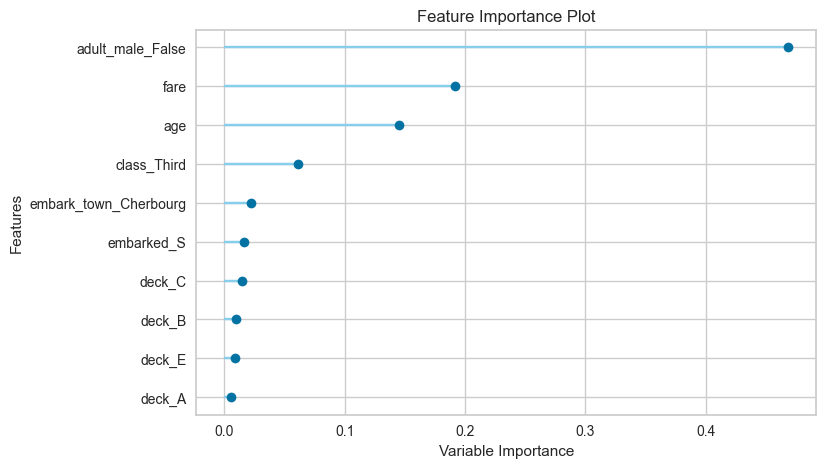

In [22]:
plot_model(tuned_gbc, plot='feature')

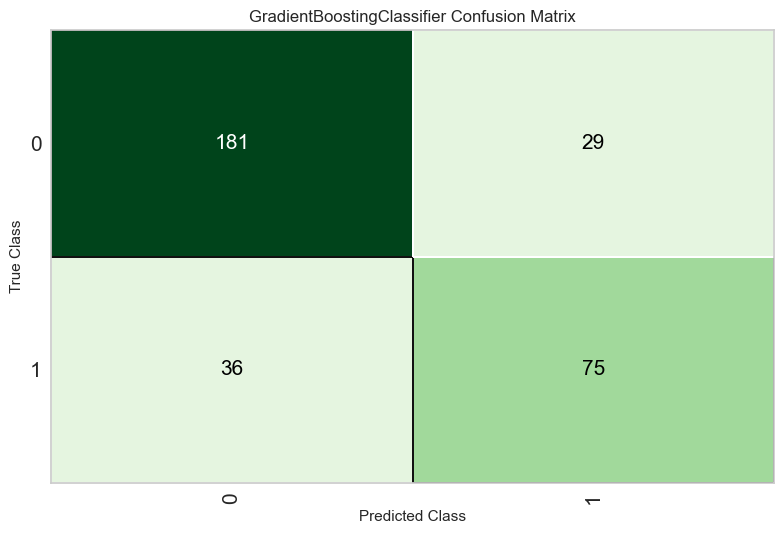

In [23]:
plot_model(tuned_gbc, plot='confusion_matrix')

In [28]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8692,0.9368,0.7928,0.8224,0.8073,0.7083,0.7086


,age,fare,pclass_1,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,parch_0,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,alone_False,survived,Label,Score
0,-1.136361,-0.535485,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,0,0.5003
1,-1.208501,-0.450946,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1,0.5014
2,0.402762,1.189516,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0.5035
3,0.271129,-0.521440,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.5033
4,-1.641342,-0.074168,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.5032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1.172125,-0.498176,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.5031
317,0.035417,-0.197947,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0.5002
318,-1.172431,-0.383263,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,1,0.5008
319,-0.054258,-0.413901,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.5034


In [29]:
tuned_gbc = finalize_model(tuned_gbc)

In [30]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=8,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=70, n_iter_no_change=None,
                           presort='deprecated', random_state=123,
                           subsample=0.45, tol=0.0002, validation_fraction=0.1,
                           verbose=0, warm_start=False)

In [31]:
test_predictions = predict_model(tuned_gbc, data = test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8764,0.9259,0.8000,0.8750,0.8358,0.7370,0.7389


In [32]:
save_model(tuned_gbc, 'titanic_data')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['alive'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['age'],
                                       target='survived', time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type='gbdt',
                                                              class_weight=None,
                                                              co...
                                             loss='deviance', max_depth=8,
                                             max_features=1.0,
                                             max_leaf_nodes=None,
         